<a href="https://colab.research.google.com/github/AIPI510/aipi510-fall24/blob/lecture-code/week_5_lecture_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Global Power Plant Database Exploratory Data Analysis

In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler

# Load the preprocessed dataset
df = pd.read_csv("../data/globalpowerplantdatabasev130/interim/global_power_plant_database_preprocessed.csv")
print("✅ Loaded:", df.shape)


✅ Loaded: (33138, 22)


/var/folders/sn/_wy_qg2x1lx42nh3x9zmcfxr0000gn/T/ipykernel_8230/3747160147.py:8: DtypeWarning: Columns (8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/globalpowerplantdatabasev130/interim/global_power_plant_database_preprocessed.csv")


## Questions we are asking:
* What are the dimensions of the dataset (number of rows and columns)?
* What are the data types of the variables (numerical, categorical, text, etc.)?
* Are there any missing values, and if so, how are they represented?


In [54]:
# Data Structure
print("Data Structure")
print("---------------")
print(f"Dimensions: {df.shape}")
print(f"Data Types:\n{df.dtypes}")
print(f"Missing Values:\n{df.isnull().sum()}")


Data Structure
---------------
Dimensions: (33138, 22)
Data Types:
country                   object
country_long              object
name                      object
gppd_idnr                 object
capacity_mw              float64
latitude                 float64
longitude                float64
primary_fuel              object
other_fuel1               object
other_fuel2               object
other_fuel3               object
commissioning_year       float64
owner                     object
wepp_id                   object
year_of_capacity_data    float64
generation_gwh_2013      float64
generation_gwh_2014      float64
generation_gwh_2015      float64
generation_gwh_2016      float64
generation_gwh_2017      float64
generation_gwh_2018      float64
generation_gwh_2019      float64
dtype: object
Missing Values:
country                      0
country_long                 0
name                         0
gppd_idnr                    0
capacity_mw                  0
latitude              

##Interpretation

This indicates that there are 150 observations (samples) of iris flowers, with each observation having 4 feature measurements and 1 target (species) label.

The numerical features represent the measurements of the iris flowers (sepal length, sepal width, petal length, petal width), while the categorical feature represents the species of the iris flower.

The dataset is complete, and no imputation or deletion of rows/columns is necessary.

## Questions we are asking:
* What are the central tendency measures (mean, median, mode) for numerical variables?
* What are the measures of dispersion (range, variance, standard deviation) for numerical variables?
* What is the distribution of the variables (normal, skewed, etc.)?


In [55]:
# Descriptive Statistics
print("\nDescriptive Statistics")
print("----------------------")
numeric_columns = df.select_dtypes(include=[np.number]).columns
print("Central Tendency Measures:")
print(df[numeric_columns].describe().loc[['mean', '50%']])
print("\nDispersion Measures:")
print(df[numeric_columns].describe().loc[['std', 'min', 'max']])

# Check for distribution normality (skewness and kurtosis)
print("\nDistribution Measures:")
print("------------------------")
print(df[numeric_columns].skew())
print(df[numeric_columns].kurt())


Descriptive Statistics
----------------------
Central Tendency Measures:
      capacity_mw   latitude  longitude  commissioning_year  \
mean   169.895859  33.392084  -5.692751         1997.168699   
50%     17.920000  39.784900  -1.666000         2007.000000   

      year_of_capacity_data  generation_gwh_2013  generation_gwh_2014  \
mean            2018.284164           681.710633           679.024057   
50%             2019.000000            33.853905            34.200000   

      generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
mean           679.897108           679.922389           677.289762   
50%             33.740000            34.064722            33.820000   

      generation_gwh_2018  generation_gwh_2019  
mean           680.190631           690.554873  
50%             34.281000            36.027000  

Dispersion Measures:
      capacity_mw  latitude   longitude  commissioning_year  \
std    500.395141  21.94533   79.078528           23.704931   
min    

## Interpretation

#### Descriptive Statistics
The mean and median capacity_mw and generation_gwh_{year} show that there are a lot of small power plants, but a few huge plants offset the mean to be much higher than the median. This is expected as capacity_mw ranges from 1 to 22500.

#### Dispersion Measures
There is wide variety of values for capacity_mw which is expected because plants range from small coal to very large hydro plants. Stnadard deviation for generation_gwh_{year} is relatively contstant whoch shows that there are most likely not any large errors in the data or prepocessing.

#### Distribution Measures
Skewness values close to 0 indicate a symmetric distribution, while positive or negative values indicate right or left skew, respectively. Kurtosis indicates the "tailedness" of the distribution; values close to 0 suggest a normal distribution, while higher values suggest heavier tails.

Capacity_mw shows positive skewness and very positive kurtosis which means right skewness with very heavy tails. Generation_gwh_{year} also shows this behavior. This further supports the hyptothesis that a few large power plants skew the data heavily to the right.

## Questions we are asking:
* Are there any duplicated rows or inconsistent values?
* Are there any outliers or extreme values that need attention?
* Do the values make sense based on the context and domain knowledge?


In [56]:
# Data Quality
print("\nData Quality")
print("------------")
print(f"Duplicated Rows: {df.duplicated().sum()}")
print("Checking for Inconsistent Values:")
print(df.apply(lambda x: x.value_counts().index[0]).to_frame('most_frequent_value'))


Data Quality
------------
Duplicated Rows: 0
Checking for Inconsistent Values:
                            most_frequent_value
country                                     USA
country_long           United States of America
name                                      Funil
gppd_idnr                          GEODB0040538
capacity_mw                                 5.0
latitude                                -2.5213
longitude                               121.357
primary_fuel                              Solar
other_fuel1                                 Oil
other_fuel2                                 Gas
other_fuel3                             Biomass
commissioning_year                       2016.0
owner                  Cypress Creek Renewables
wepp_id                                 1082676
year_of_capacity_data                    2019.0
generation_gwh_2013                         0.0
generation_gwh_2014                         0.0
generation_gwh_2015                         0.0
generati

## Interpretation

There are no duplicate rows in tis dataset which shows high data quality.

A high frequency of USA solar powerplants reflects recent trends of green energy which supports the validity of this data. Also, the frequency of 0.0 for generation_gwh shows that there have been many power plants built recently which is expected.

## Questions we are asking:

* Is there any correlation between pairs of numerical variables?
* Are there any noticeable patterns or trends in the data?
* How are categorical variables related to numerical variables?



Variable Relationships
----------------------
Correlation Matrix:
                       capacity_mw  latitude  longitude  commissioning_year  \
capacity_mw               1.000000 -0.020948   0.148606           -0.010307   
latitude                 -0.020948  1.000000  -0.082390           -0.154029   
longitude                 0.148606 -0.082390   1.000000           -0.021218   
commissioning_year       -0.010307 -0.154029  -0.021218            1.000000   
year_of_capacity_data     0.033448  0.420639  -0.182767           -0.059437   
generation_gwh_2013       0.922715 -0.022214   0.150468           -0.005243   
generation_gwh_2014       0.924565 -0.022289   0.151455           -0.005144   
generation_gwh_2015       0.923999 -0.022676   0.150549           -0.001866   
generation_gwh_2016       0.925414 -0.022970   0.154249            0.002388   
generation_gwh_2017       0.922834 -0.022634   0.153409            0.003957   
generation_gwh_2018       0.924444 -0.023435   0.153825         

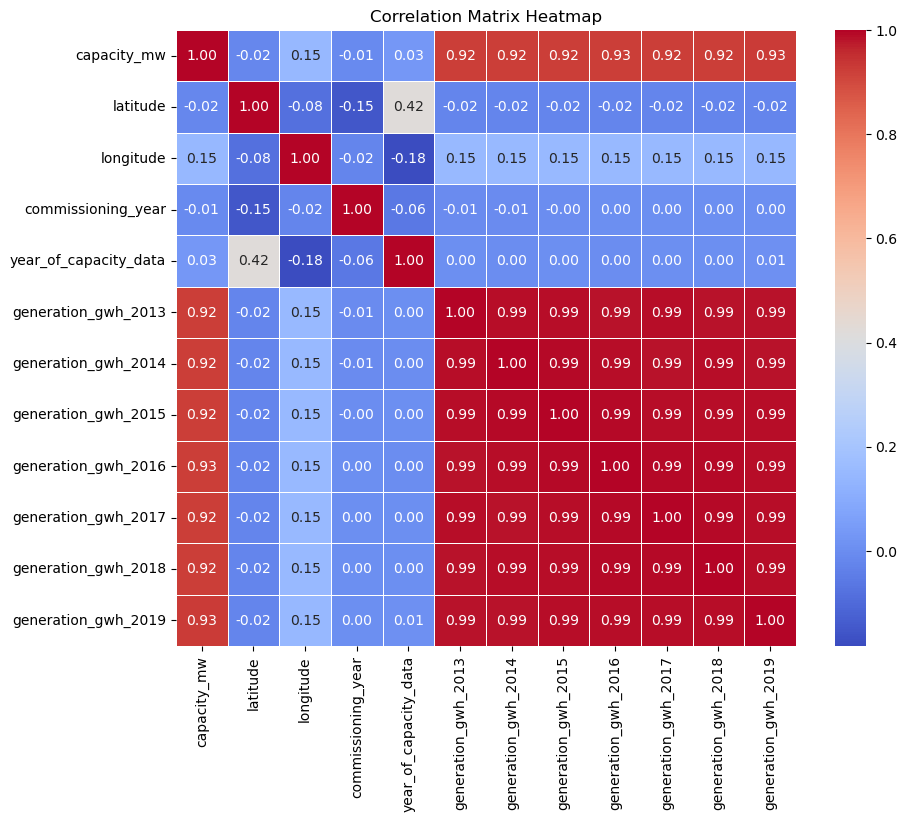

In [57]:
# Variable Relationships
print("\nVariable Relationships")
print("----------------------")
print("Correlation Matrix:")
correlation_matrix = df[numeric_columns].corr()
print(correlation_matrix)

# Visualize the Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

## Interpretation

There is a strong relationship between capacity_mw and generation_gwh_{year} which is expected because high capacity power plants will have higher yearly generation rate. There is also a strong rwaltionship between years for generation_gwh_{year}, but this is expected because generation rate is relatively constant as shown by the consistant standard deviation between years.

## Questions we are asking:

* How can the variables be visualized effectively (histograms, scatterplots, box plots, etc.)?
* Do the visualizations reveal any interesting patterns or insights?
* Are there any subgroups or clusters that can be identified visually?


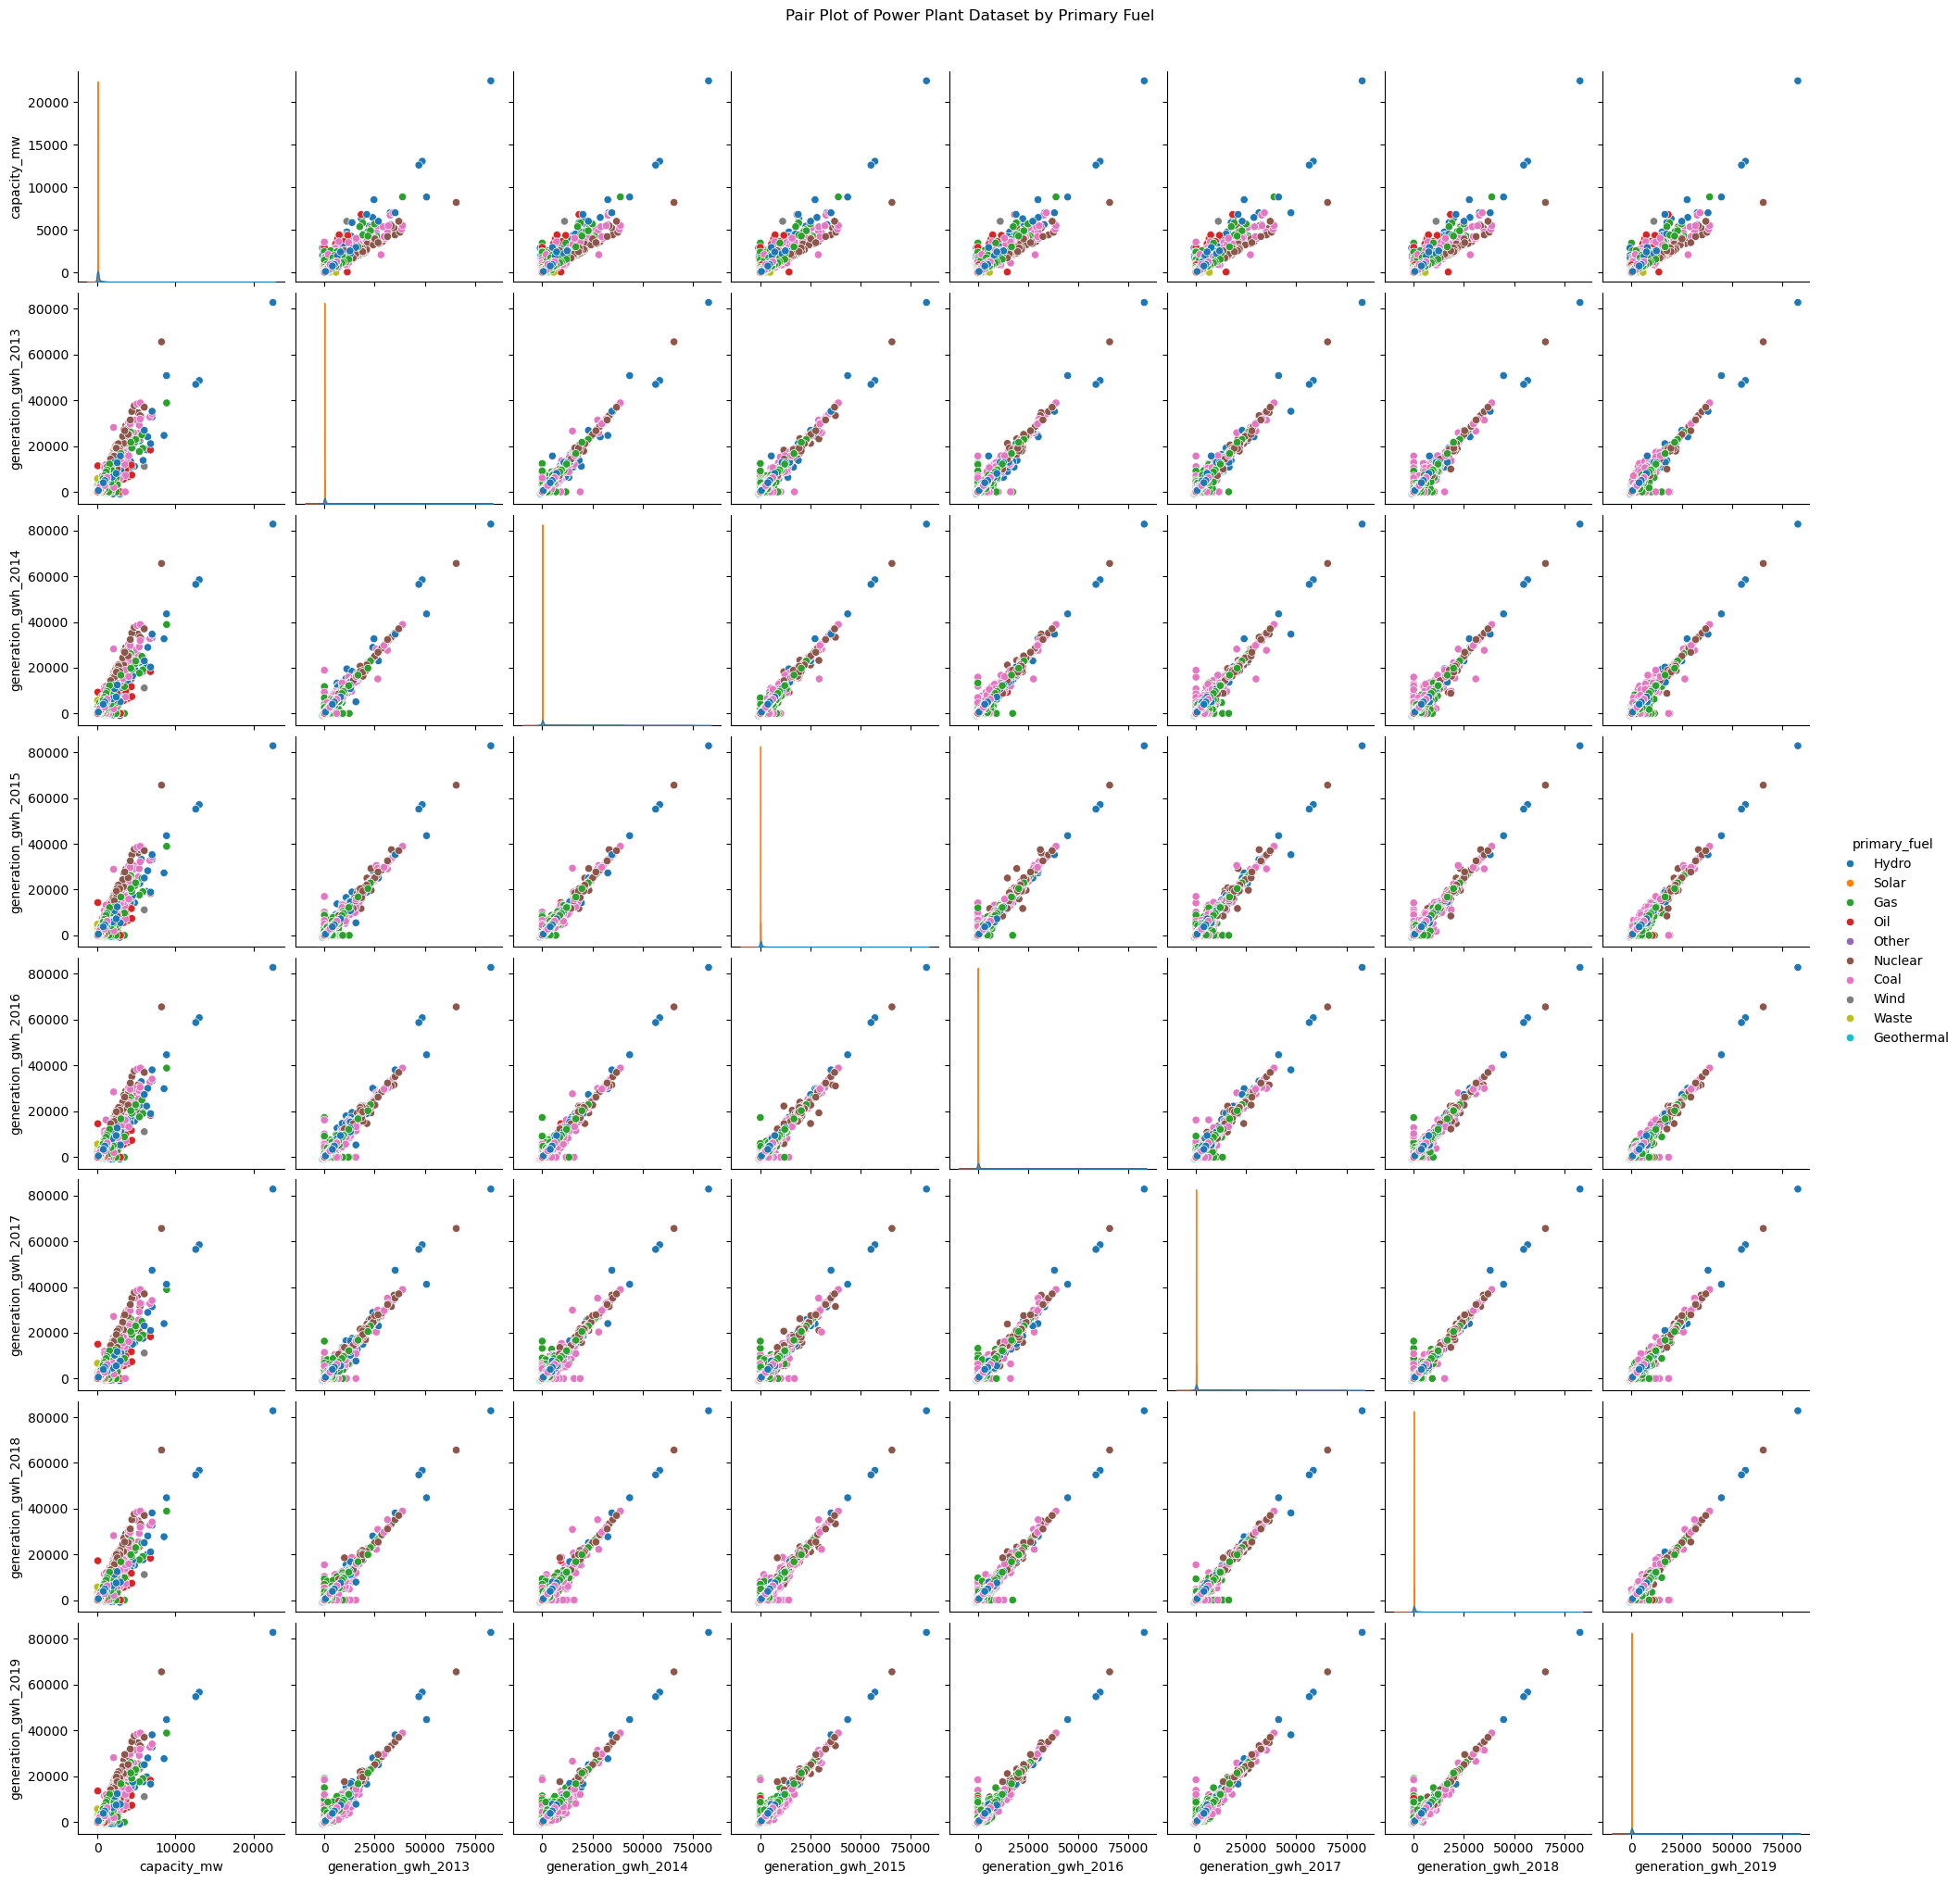

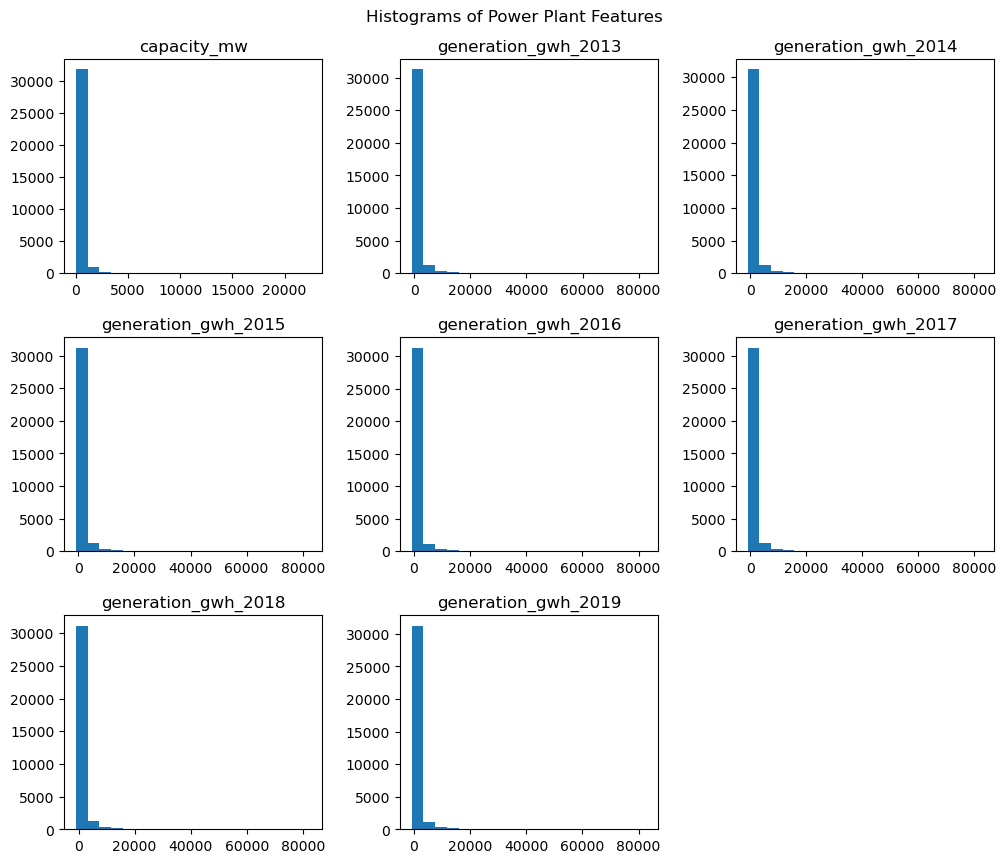

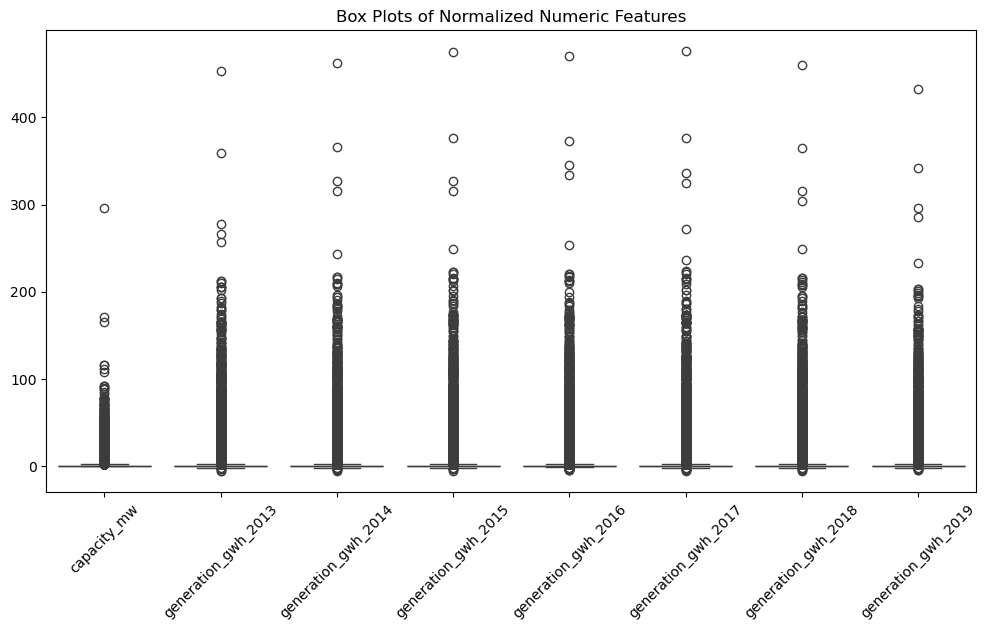

In [58]:
# Data Visualization
# Numeric Columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
exclude_cols = ["latitude", "longitude", "commissioning_year", "year_of_capacity_data"]
numeric_columns = [col for col in numeric_columns if col not in exclude_cols]

# Pairplot of numeric features by primary_fuel
sns.pairplot(df[numeric_columns + ["primary_fuel"]], hue="primary_fuel", diag_kind="kde")
plt.suptitle("Pair Plot of Power Plant Dataset by Primary Fuel", y=1.02)
plt.show()

# Histograms
df[numeric_columns].hist(bins=20, figsize=(12, 10), grid=False)
plt.suptitle("Histograms of Power Plant Features", y=0.93)
plt.show()

"""
This transformation is being done because without normalization, the box plot provides useless visualization for all but one column.
The data is normalized using standard scalar. I
"""

scaled_df = pd.DataFrame(
    RobustScaler().fit_transform(df[numeric_columns]),
    columns=numeric_columns
)

# Box Plots
plt.figure(figsize=(12, 6))
sns.boxplot(data=scaled_df[numeric_columns])
plt.title("Box Plots of Normalized Numeric Features")
plt.xticks(rotation=45)
plt.show()

## Interpretation

#### Pair Plot:
There are not clear collections of data for each power plant type. Data seems to be centered around a line that is easily given by an equation. Capacity_mw plots show a few points that do not follow the trend line, but this is epxected as some plants may run only during the day for example, so mwh will be higher to make up for downtime.The outliers are not a big concern as the vast majority if data is around a clear line. Since there are not clear clusters, primary fuel type does not have a large contrivution to capacity or generation (GWh)

#### Histograms:
Capacity and genration rate all show heavy left skew which is expected as the majority of power plants are very small. This is supported by the fact that the mean is muchh larger than the median.

#### Box Plots:
Box plots show for capacity and generation there are a large amount of outliers greated than the standard range. THis is relaistic and shows that small power plants greatly outnumber large power plants. These outliers should not be removed as they hold meaningful data aboiut larger power plants.

## Questions we are asking:

* Are there any new features that can be derived from the existing ones?
* Is there a need to transform or scale any variables?
* Are there any variables that can be combined or decomposed?


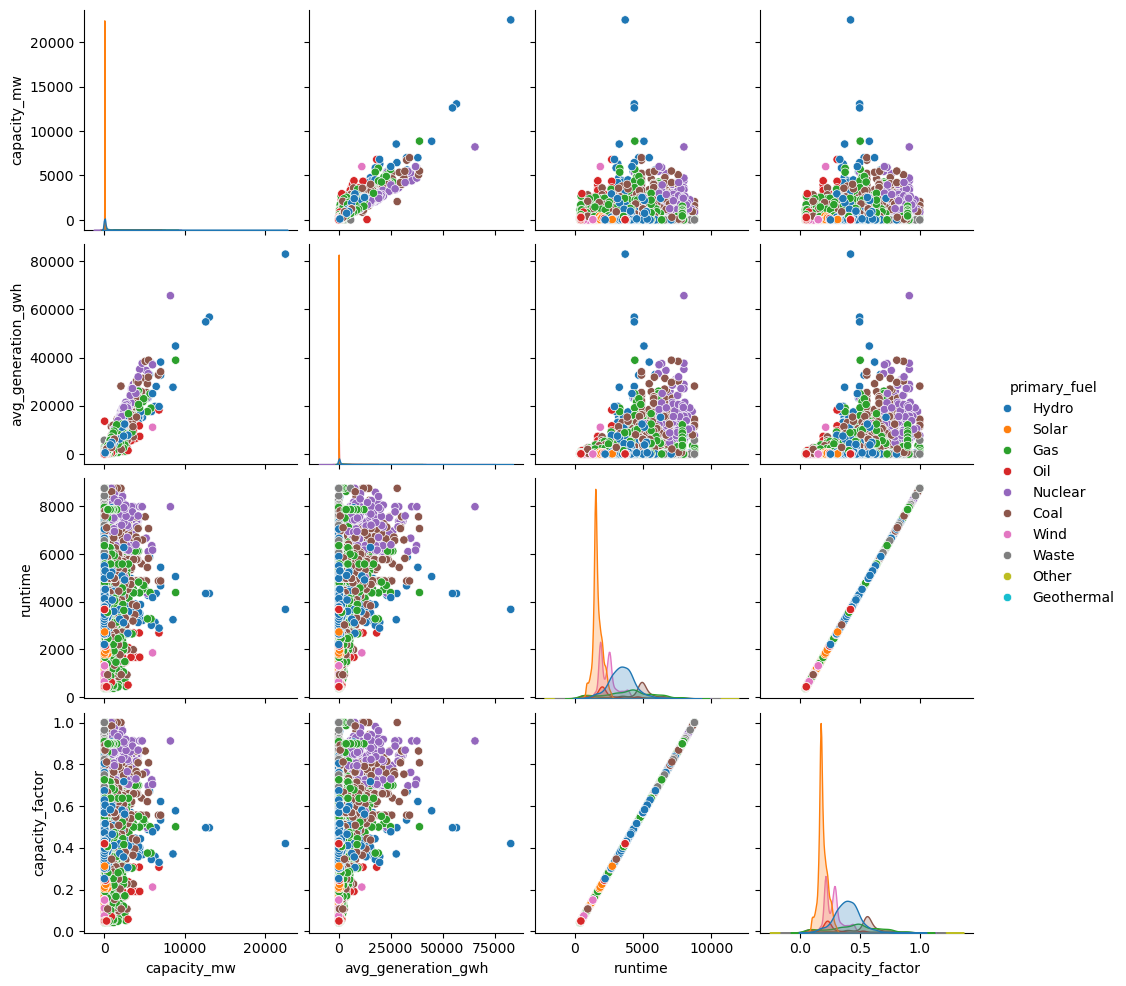

In [60]:
# Feature Engineering

# Compute avg_generation_gwh
df["avg_generation_gwh"] = df[[f"generation_gwh_{y}" for y in range(2013, 2020)]].mean(axis=1)

# Compute runtime hours
df["runtime"] = (df["avg_generation_gwh"] * 1000) / df["capacity_mw"]

# Cap runtime at the number of hours in a year because >8760 hours is not possible
df["runtime"] = df["runtime"].clip(upper=8760)

# Also compute capacity factor (0–1 scale, easier to interpret)
df["capacity_factor"] = df["runtime"] / 8760

# Filter out capacity factor > 0, because this is not possible, and therefore these data points are not valid
df = df[(df["capacity_factor"] >= 0) & (df["capacity_factor"] <= 1)]
df = df[df["runtime"] >= 365]

# Visualize with pairplot
sns.pairplot(
    df[["capacity_mw", "avg_generation_gwh", "runtime", "capacity_factor", "primary_fuel"]], hue="primary_fuel", diag_kind="kde"
)
plt.show()

## Interpretation

#### New Features (Sepal Area and Petal Area):
New features runtime and capacity_factor were created. Runtime measures the average number of hours in year the plant is used. This can be used to filter out plants with very little run time which could cause bad data. Capacity_factor shows the ration of power generated vs power generated if ran 24/7. 

Solar has a low average capacity factor which makes sense because it can only be run in day light. Nuclear has a very high capcity factor since it can be run 24/7/365 in theory neglecting time for maintenance and refuel. 

Plants with capapcity factor < 0 or > 1 are thrown out because this is not possible.

Plants with runtime less than 365 hour / year are thrown out becasue this means they were not used enough to serve as a meaningful data point and errors are likely to skew the data point greatly.

The box plots show some separation of data by primary_fuel which makes sense because solar/wind energy is dependent of time of day while nuclear/hydro/gas/etc. can be run at any time throughout the day. Also the largest power plants are nuclear, gas, and coal which is logical from knowledge of our modern power grid.

# Data Quality Assessment

#### Profiling:
The blood_pressure.csv data inlcludes columns: user_code, measurement_datetime, diastolic, systolic, function_changes_index, circulatory_efficiency, kerdo_vegetation_index, robinson_index. There are 720 rows of data. User_code is the categorical feature that reperesents the individual, measurement_datetime is the string that stores the datetime the data was collected, and diastolic, systolic, function_changes_index, circulatory_efficiency, kerdo_vegetation_index, and robinson_index are measured features of the individual. I added pulse_pressure which is systolic - diastolic blood pressure. This is an import measurement for assessing cardiovasuclar health.

#### Completeness:
Columnns user_code, measurement_datetime, diastolic, and systolic are complete for all rows. There are 422 vales missing for function_changes_index, 422 values missing for circulatory efficiency, 438 values missing for kerdo_vegetation_index, and 422 values missing for robinson_index. Since there are en equal number of missing values for function_changes_index, circulatory_index, and robinson_index, I believe these were collected together at set intervals at a frequency much less than diastolic and systolic blood pressure. Therefore, the missing values are likely a cause of experimental design and limitation. Function_changes_index, circulatory_efficiency, kerdo_vegetation_index, and robinson_index have rapid, large swings in values, so I do not beleive it is appropriate to estimate the >60% of values that are missing. Is these columns are important to a model, only complete data should be used.


#### Accuracy:
Data was collected by Bluetooth heartrate monitor, cellphone PPG (Photoplethysmography), user-connected gadgets, and clinically-validated assessments. Data shpws few egregious outliers and small standard deviaton relative tot range. This shows that the data is alligned between the measurement sources and most likely accurate. The three methods for data collection limit the possibility of a bad sensor corrupting the data as bad data should be easily identifiable. Systolic, diastolic, and circulatory efficiency outliers were handled as outliers were most egregious here.

#### Consistency
The small number of outliers and values for each column closely huddled around the mean show that the sensors must have been consistent and provided meaningful and consisitent data. Inconsistent data collection would be shown in outliers and data that is not centered around a clear mean. Expecially with health data, there is a known acceptible range and the vast majority of measurements should fal within this range, and for this dataset the profound majority of sample are not outliers and the outliers that exist were handled.

#### Integrity
This data has high integrity as clinically-validated procedures were taken to record this medical data. Also the bluetooth devices and gadgets are very accurate. FOr example the Apple Watch has an accuracy of >95%. The consisitency of the data also supports the integrity as many different data sources were used and there is no clear difference in measurements obtained by different data sources, as this would be seen in grouping of the data.

#### Distribution Measures
Systolic, functional_changes_index, kerdo_vegeation_iondex, and robinson_index are symmetrical as is shown by a near 0 skew. Diastolic has a left skew and circulatory_efficiency has a right skew. Systolic, funcitonal_changes_index, and kerdo_vegeation_index have a normal distrivution as is shown by a low kurtosis. Diastolic, circulatory_efficiency, and robinson index have heavy tails. Heavy tails show an increased number of outliers in the data, but circulatory efficiency is the only columns with very high kurtosis of >8. Therefore, I have handled the outliers in circulatory efficiency.

#### Lineage and Provenance
The data is well documented and collected by trusted methods and technology, so the data will remain relevant through time. The data related to Covid-19 which is nowhere near as prevelant as it was in 2020/2021, so this aspect of the data may age, but the data could still be used for modeling other illnesses that show similar symptoms.


# Visualizations

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 14.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 28.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 18.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


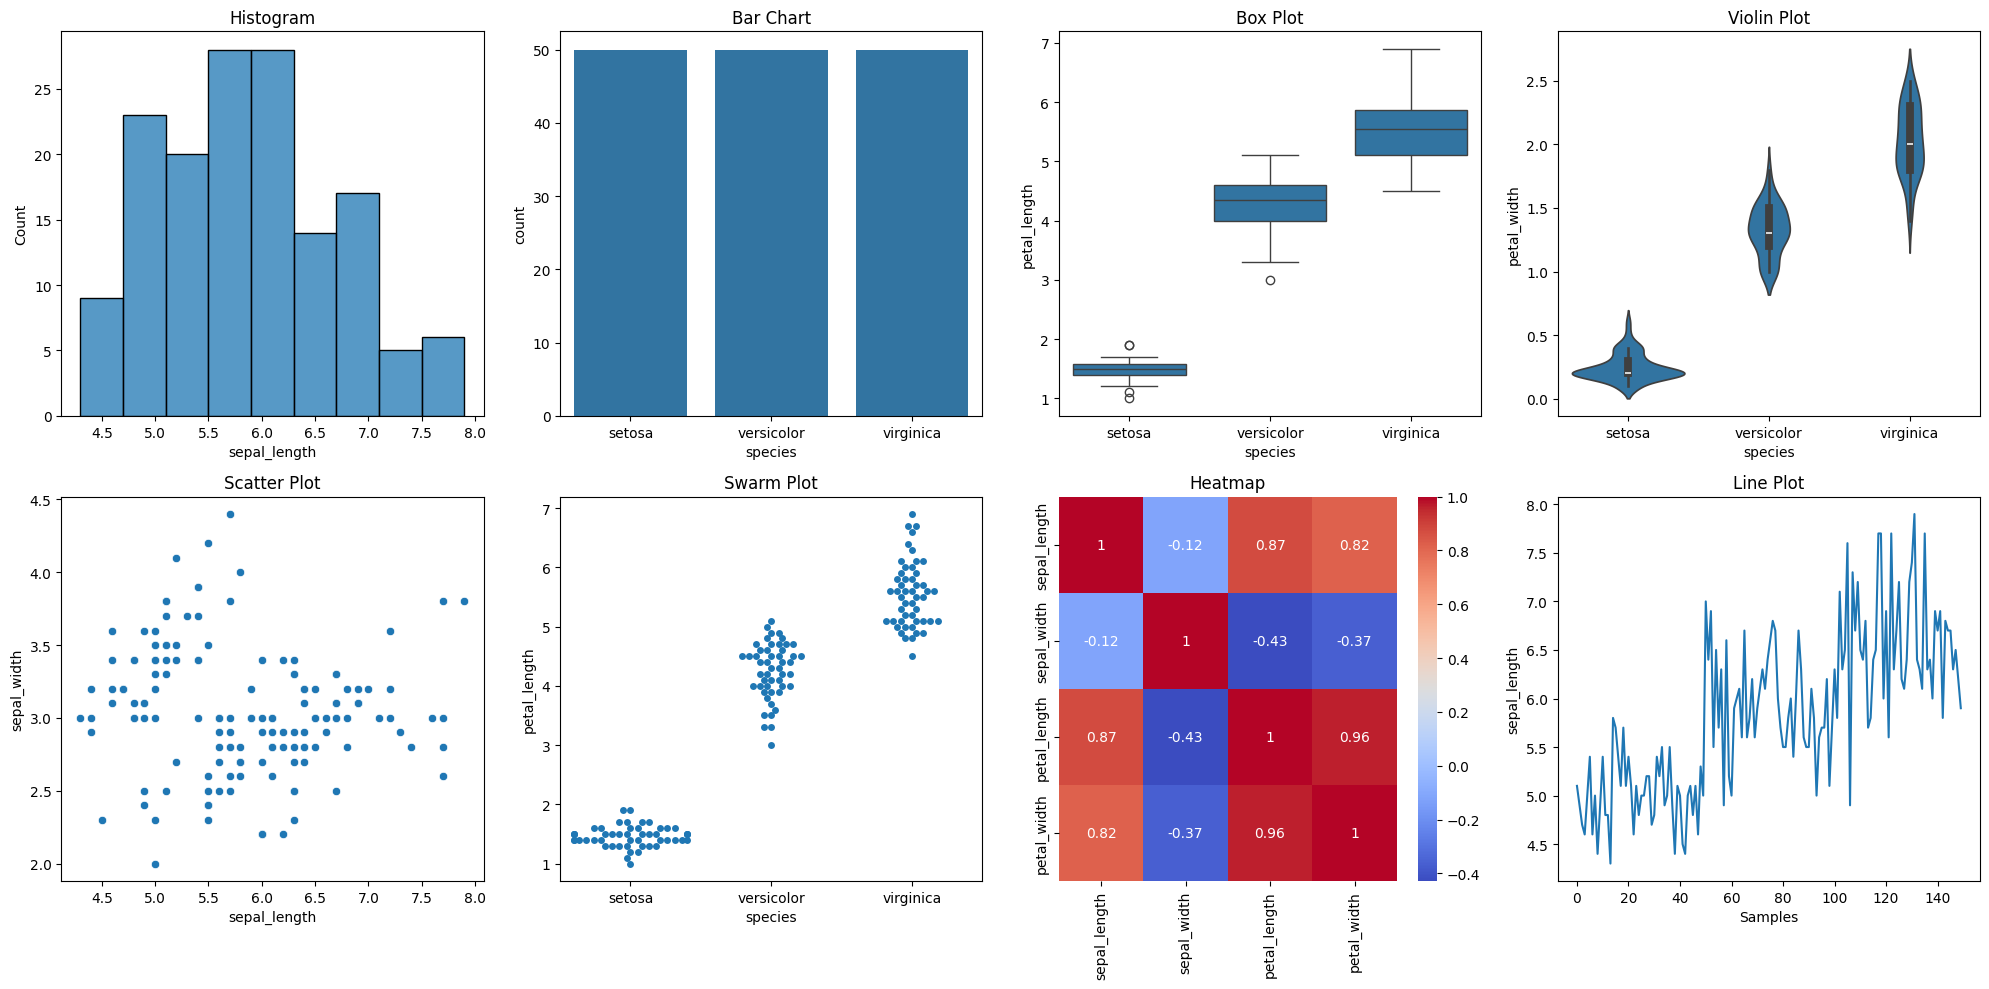

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# import pandas as pd
# from sklearn.datasets import load_iris

# # Load the Iris dataset
# iris = load_iris()
# iris_df = sns.load_dataset("iris")

# # Create a figure with subplots
# fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# # Histogram
# sns.histplot(data=iris_df, x="sepal_length", ax=axes[0, 0])
# axes[0, 0].set_title('Histogram')

# # Bar chart
# sns.countplot(x="species", data=iris_df, ax=axes[0, 1])
# axes[0, 1].set_title('Bar Chart')

# # Box plot
# sns.boxplot(x="species", y="petal_length", data=iris_df, ax=axes[0, 2])
# axes[0, 2].set_title('Box Plot')

# # Violin plot
# sns.violinplot(x="species", y="petal_width", data=iris_df, ax=axes[0, 3])
# axes[0, 3].set_title('Violin Plot')

# # Scatter plot
# sns.scatterplot(x="sepal_length", y="sepal_width", data=iris_df, ax=axes[1, 0])
# axes[1, 0].set_title('Scatter Plot')

# # Swarm plot
# sns.swarmplot(x="species", y="petal_length", data=iris_df, ax=axes[1, 1])
# axes[1, 1].set_title('Swarm Plot')

# # Heatmap
# # Drop the species column before calculating the correlation matrix
# corr_df = iris_df.drop("species", axis=1).corr()
# sns.heatmap(corr_df, annot=True, cmap="coolwarm", ax=axes[1, 2])
# axes[1, 2].set_title('Heatmap')

# # Line plot
# sns.lineplot(x=iris_df.index, y="sepal_length", data=iris_df, ax=axes[1, 3])
# axes[1, 3].set_title('Line Plot')
# axes[1, 3].set_xlabel("Samples")

# # Adjust layout
# plt.tight_layout()
# plt.show()



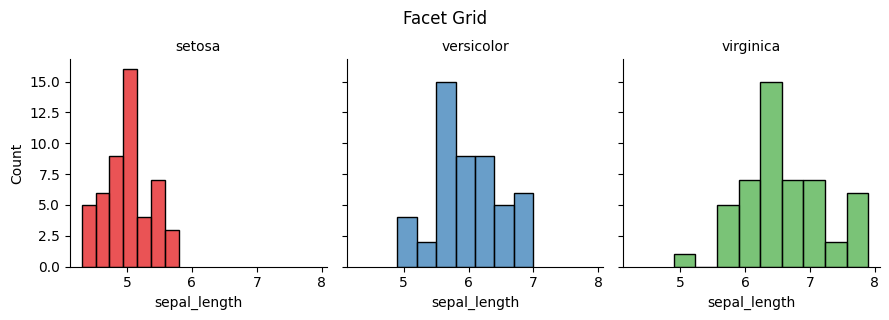

In [ ]:
# Facet grid
g = sns.FacetGrid(iris_df, col="species", hue="species", palette="Set1", col_wrap=3)
g.map(sns.histplot, "sepal_length")
g.set_titles("{col_name}")
g.fig.suptitle("Facet Grid", y=1.05)
plt.show()

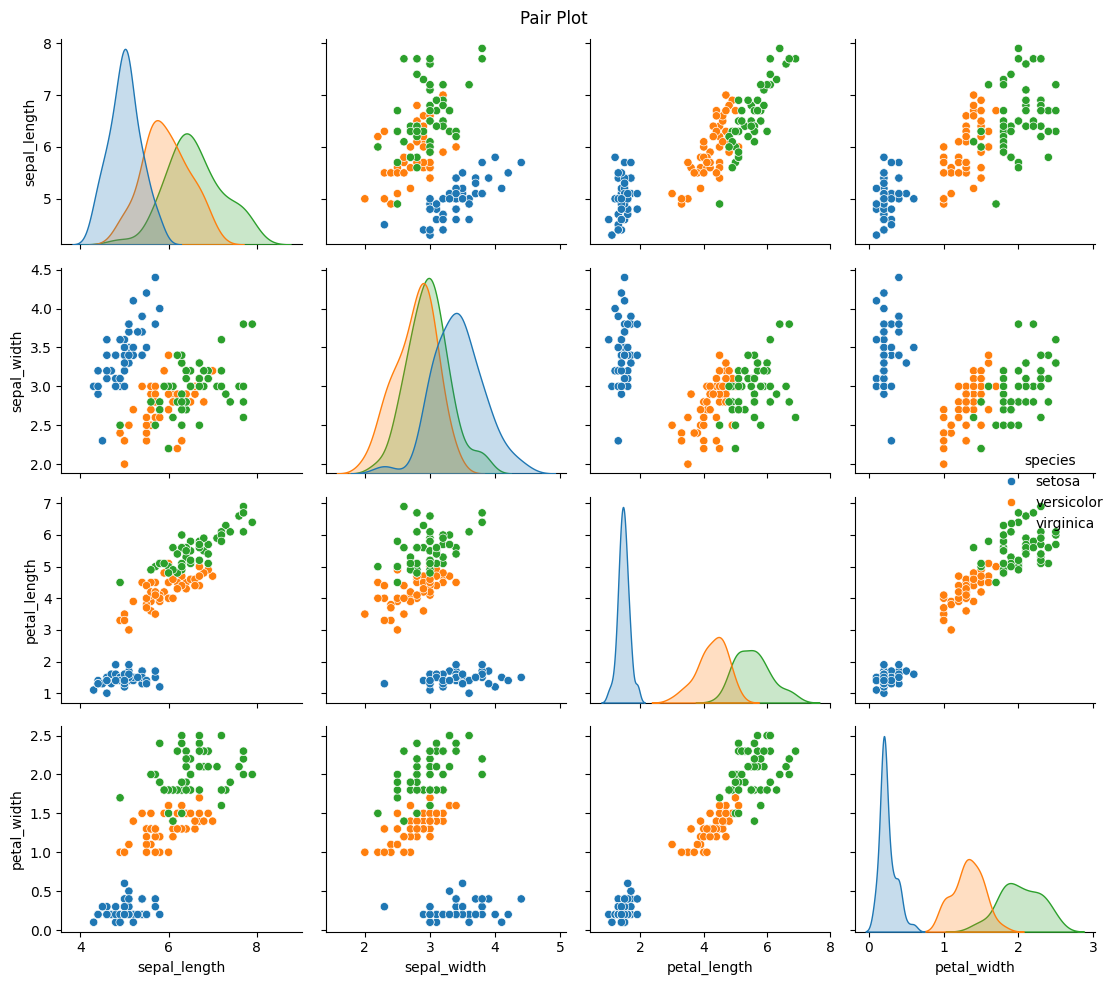

In [ ]:
# Pair plot
sns.pairplot(iris_df, hue="species", diag_kind="kde")
plt.suptitle('Pair Plot')
plt.tight_layout()
plt.show()